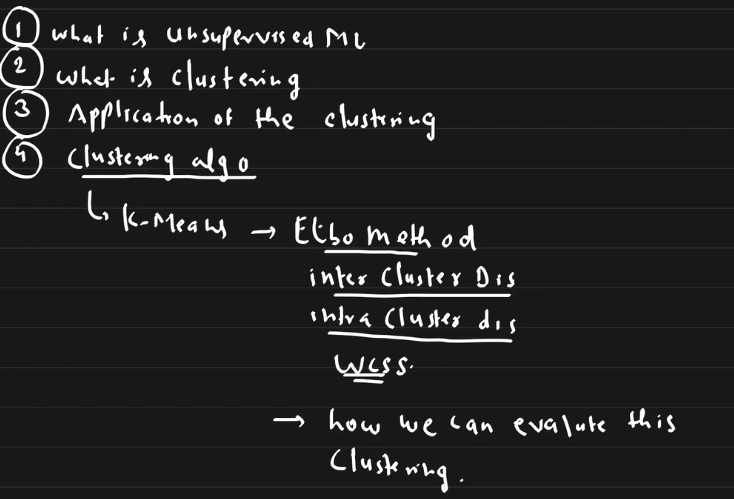

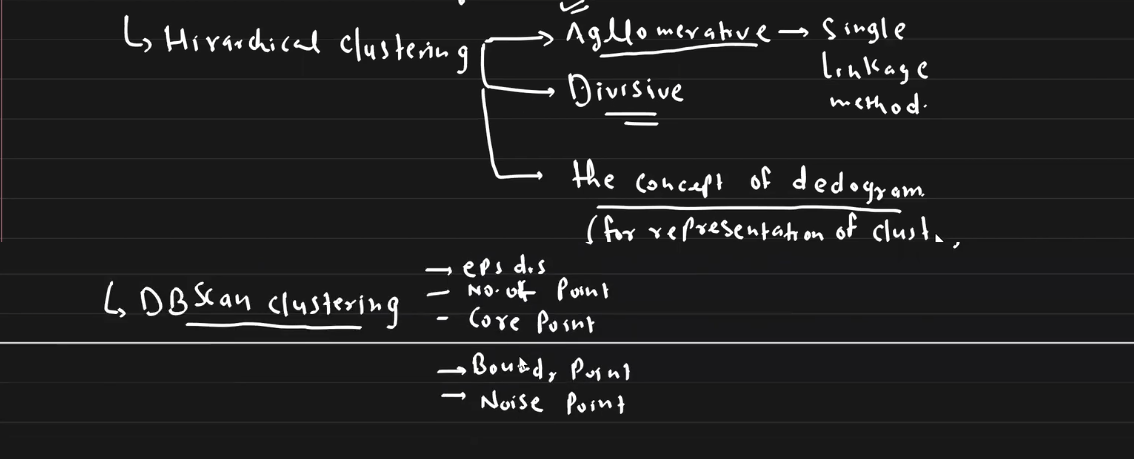

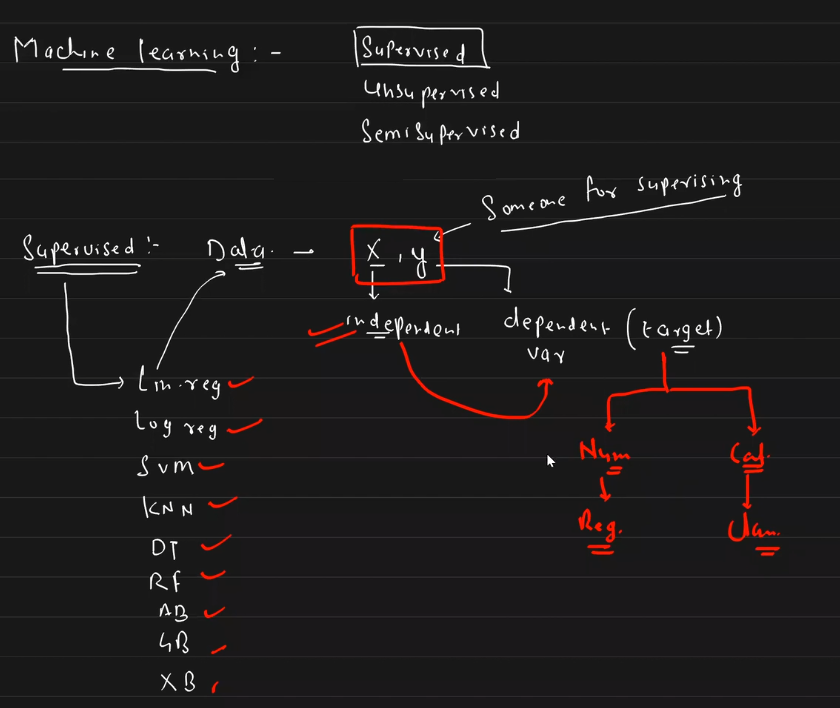

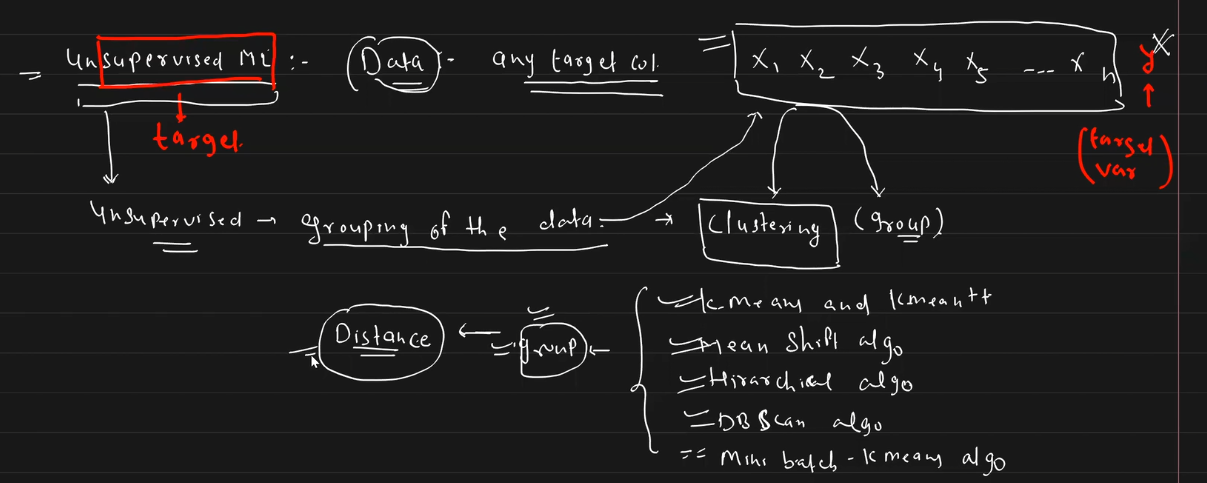

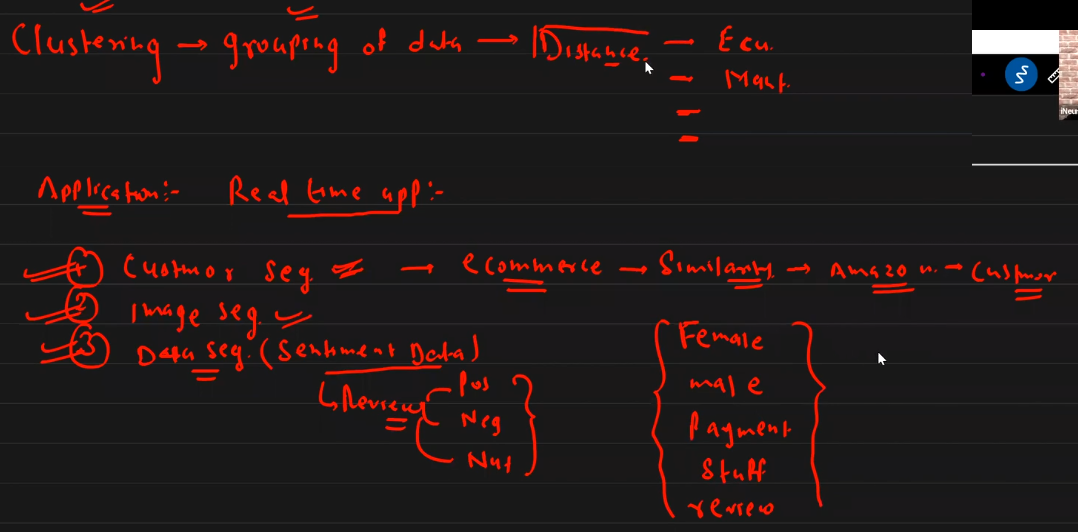

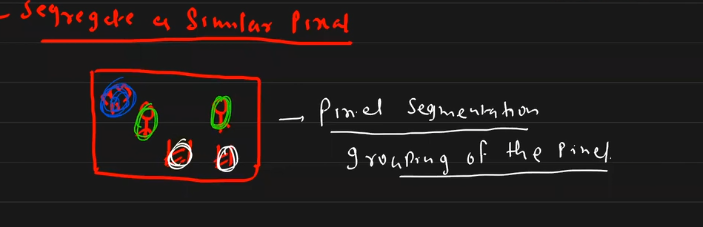

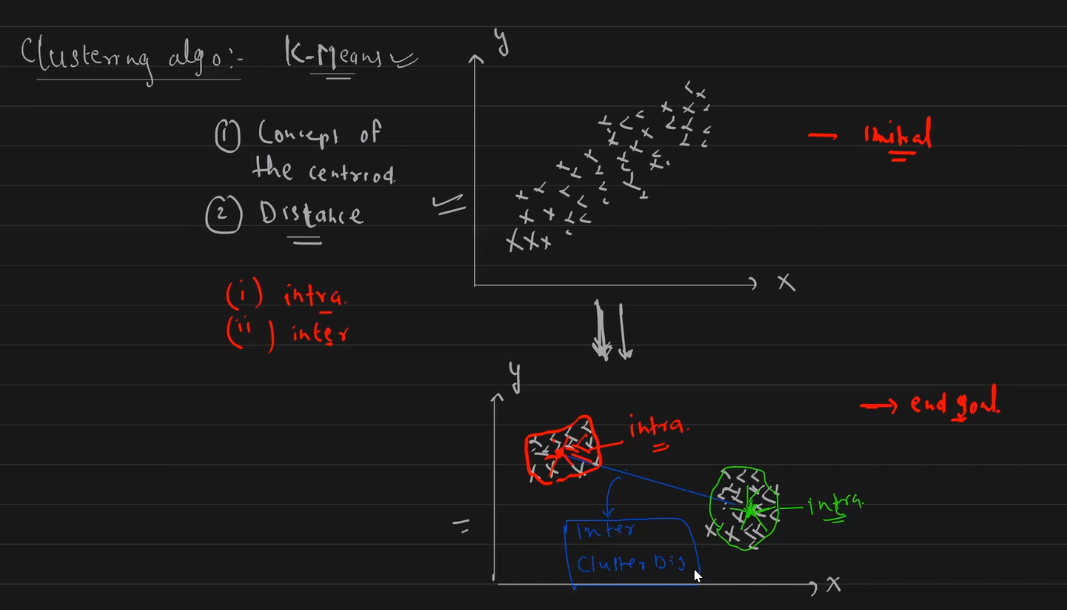

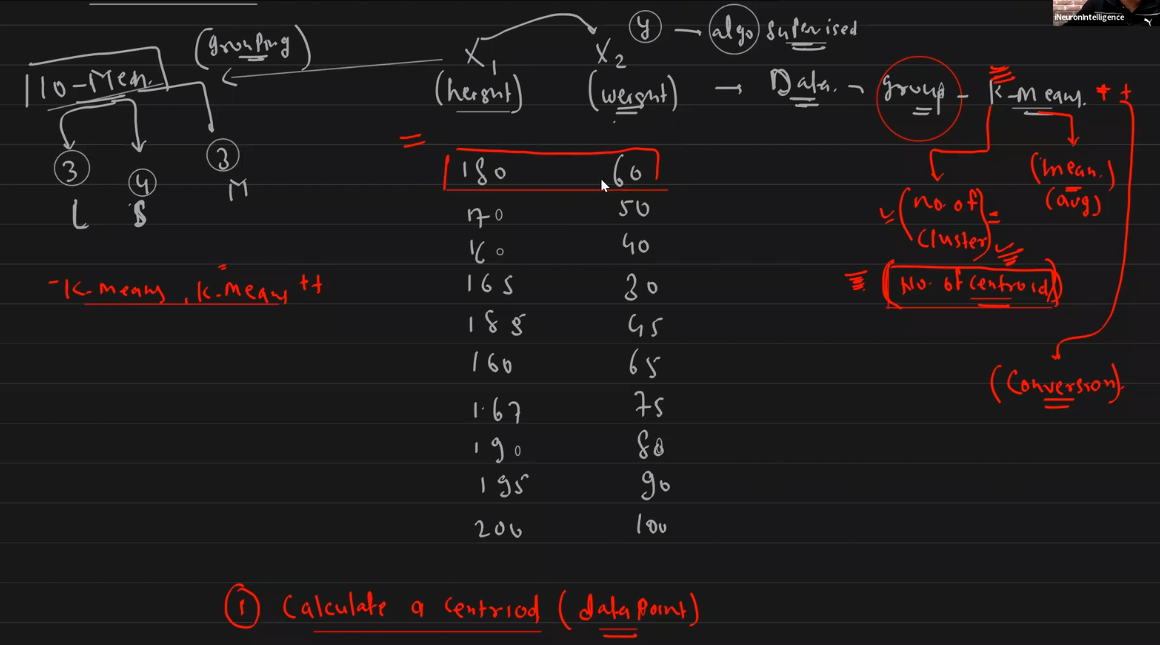

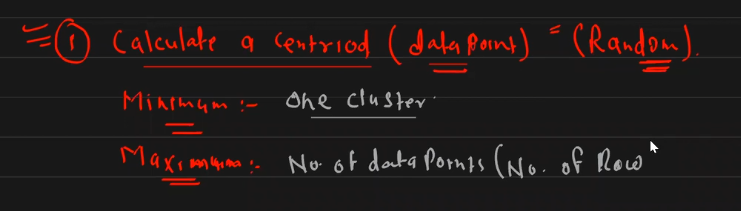

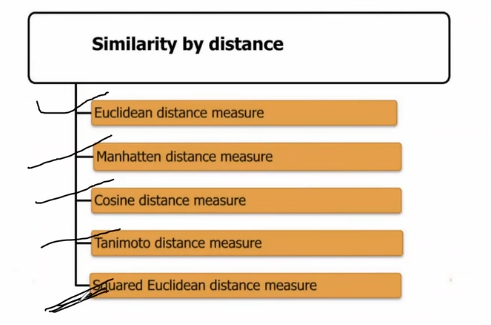

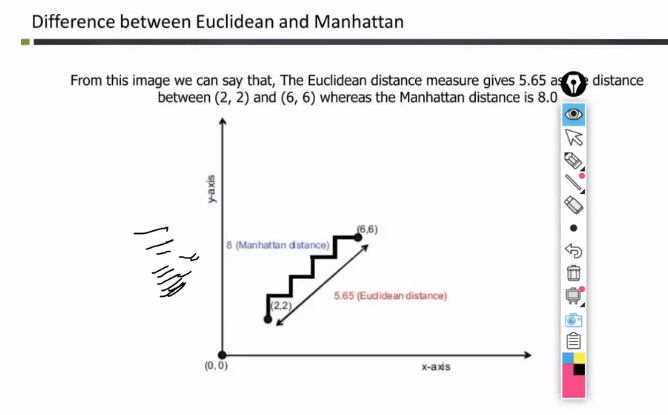

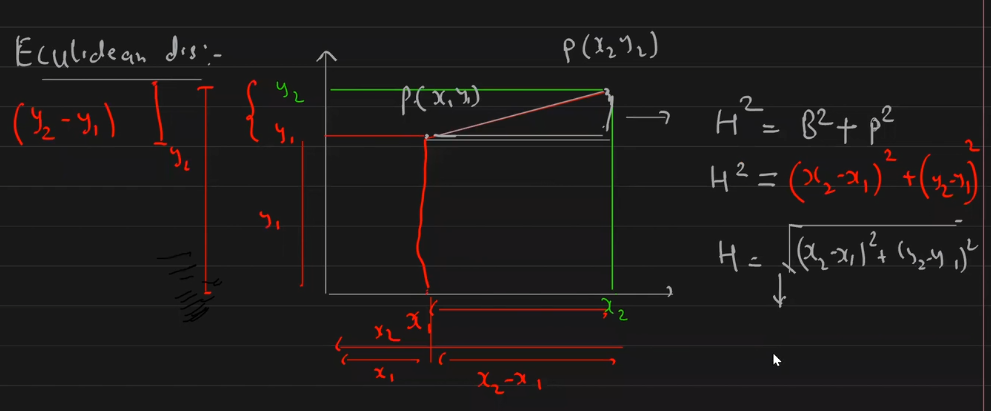

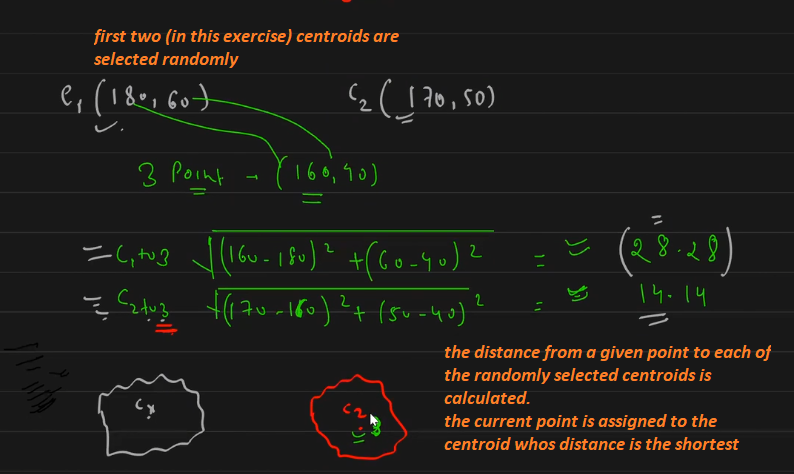

* once a point is assigned to a randomly given centroid, the mean value for that cluster needs to be updated

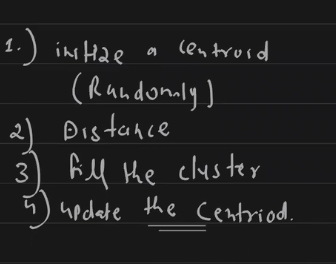

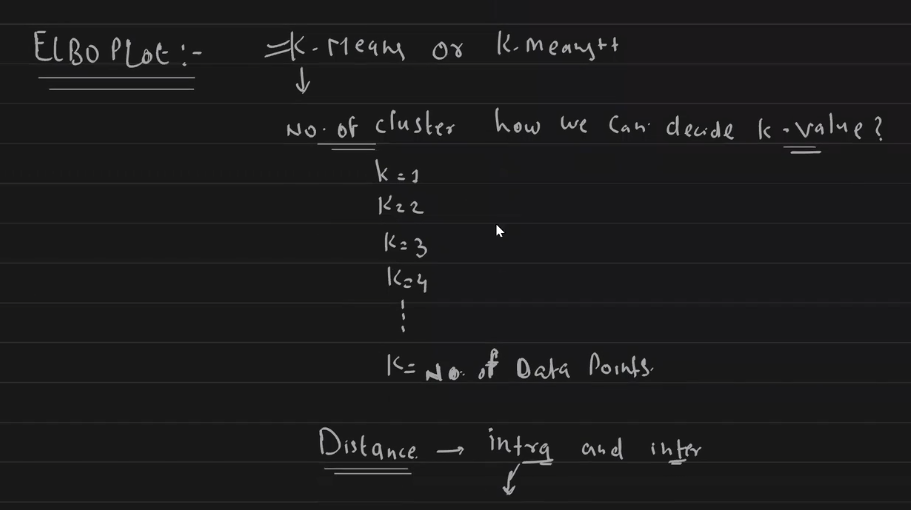

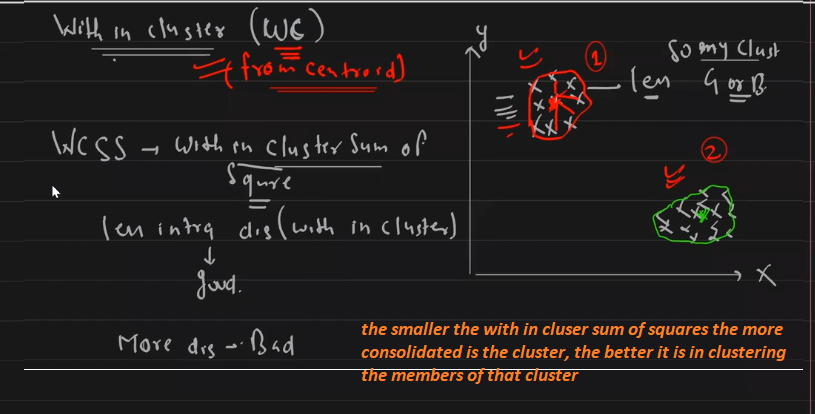

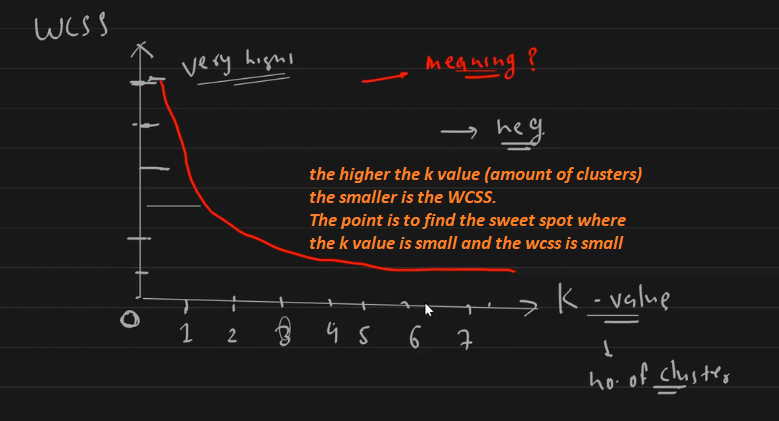

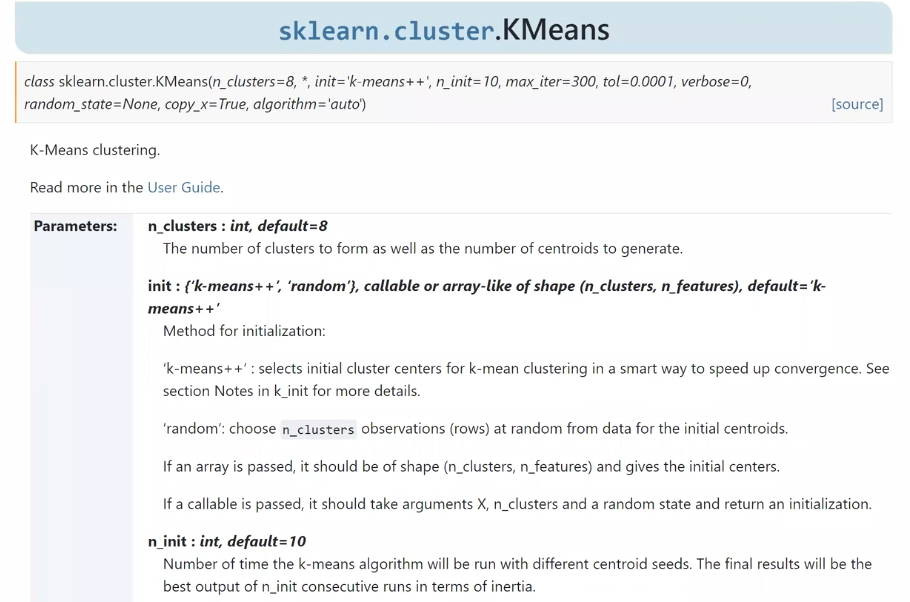

# herarcliclal clustering

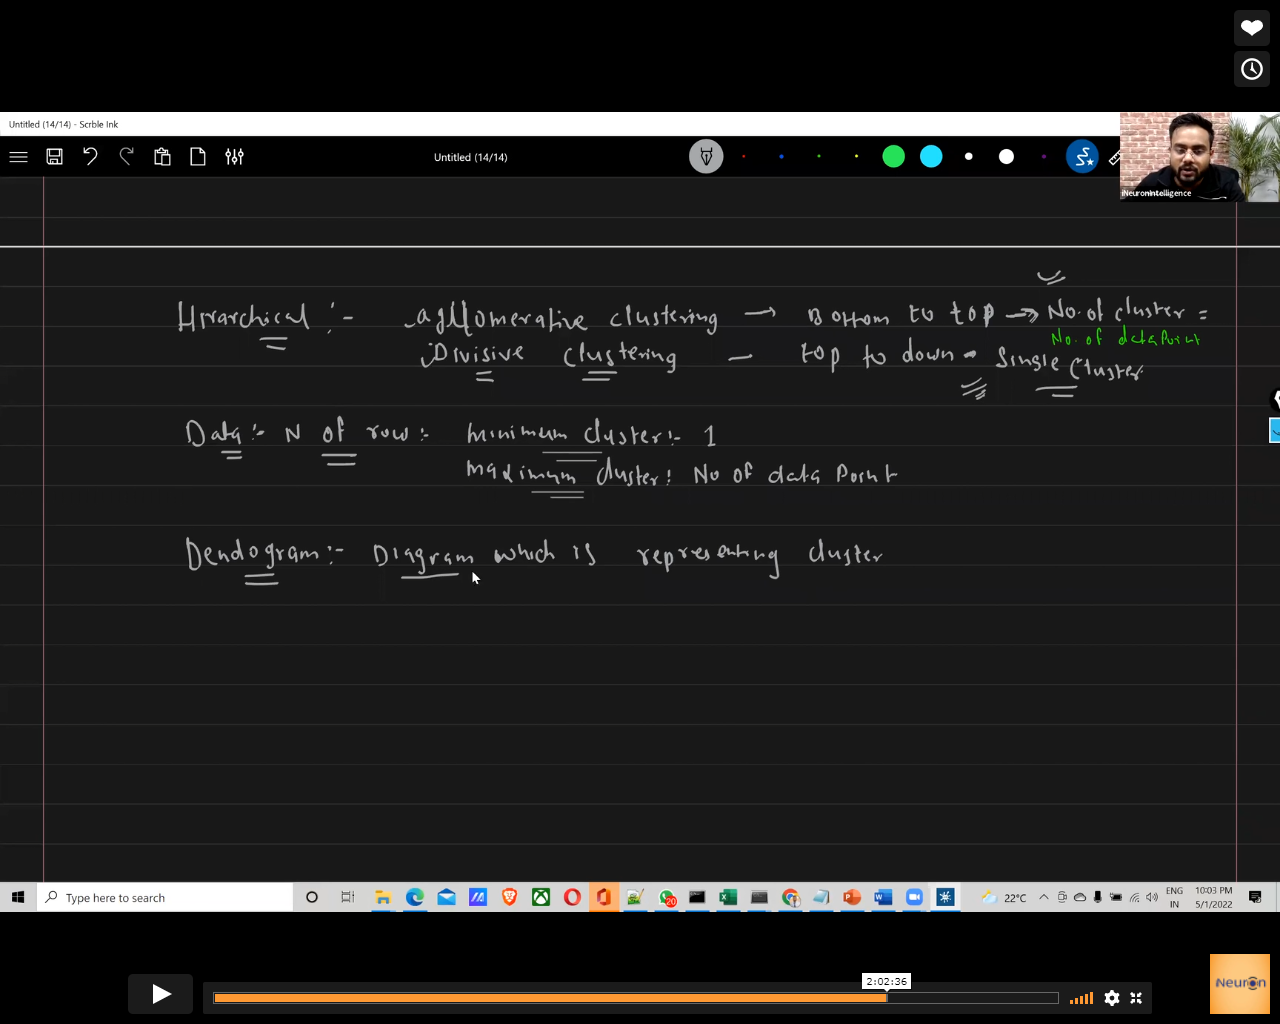

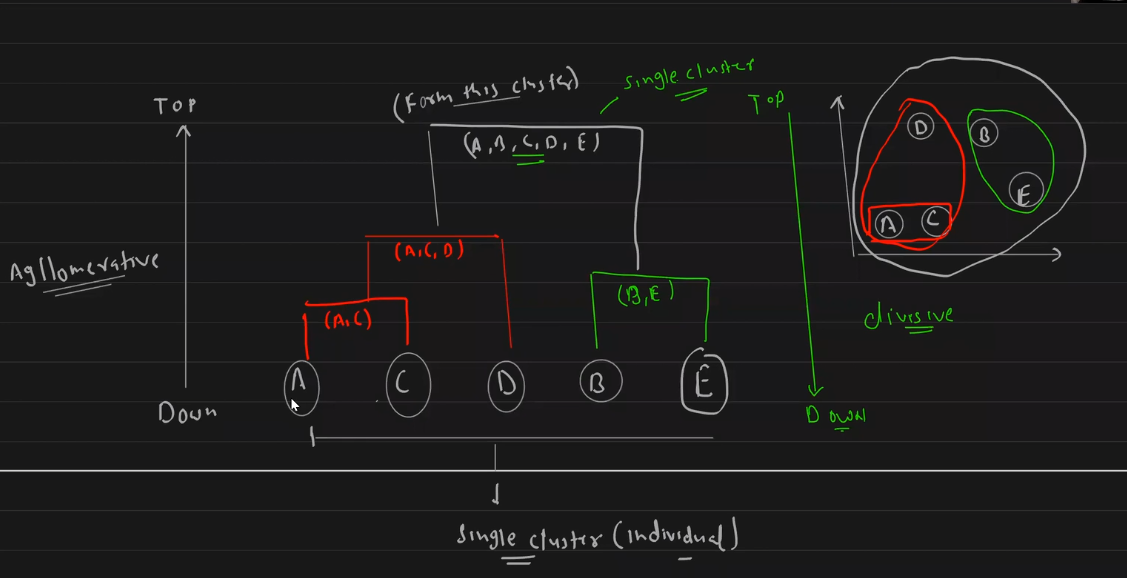

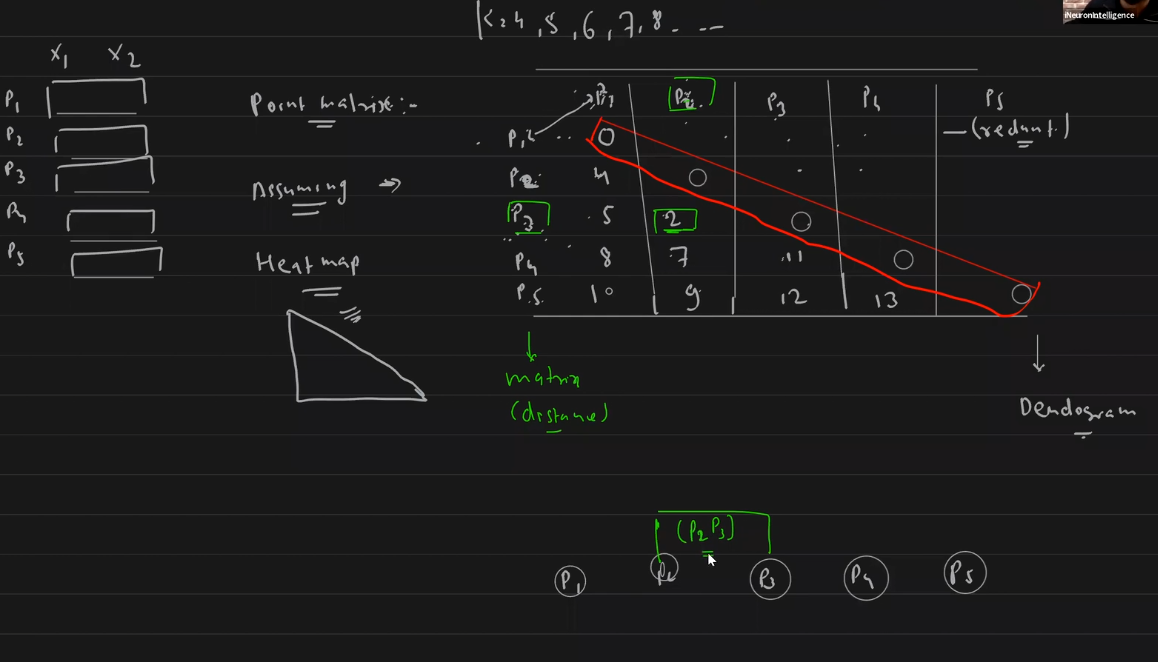

* next you cluster bettwen points and update the matrix

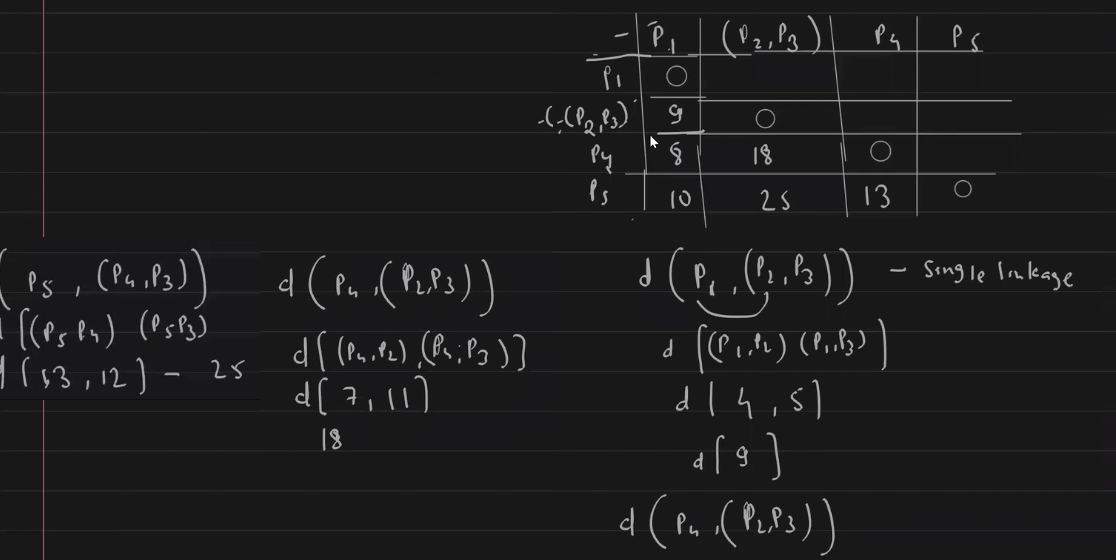

* keep constructing the dendogram

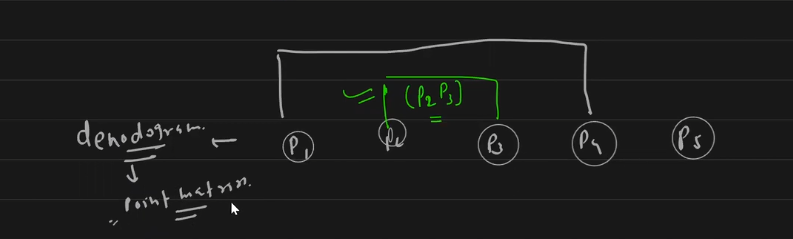

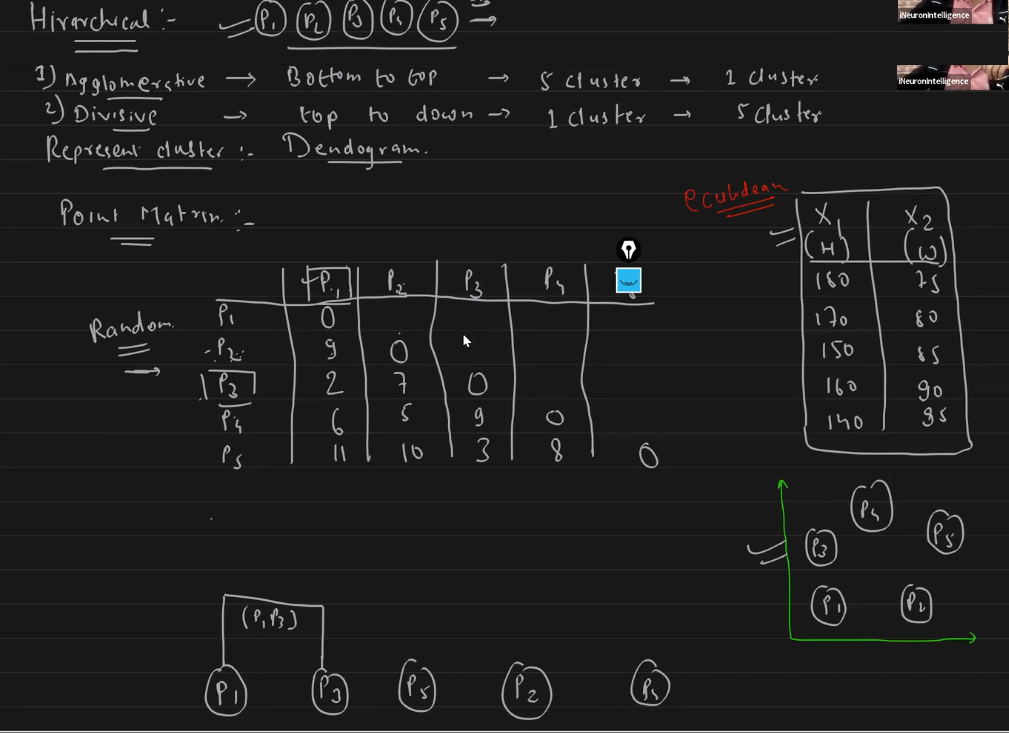

* recalculate the matrix with the p1,p3: create a new matrix by recalculating new distances with the new cluster (p1,p3) and leaving the other ones the same

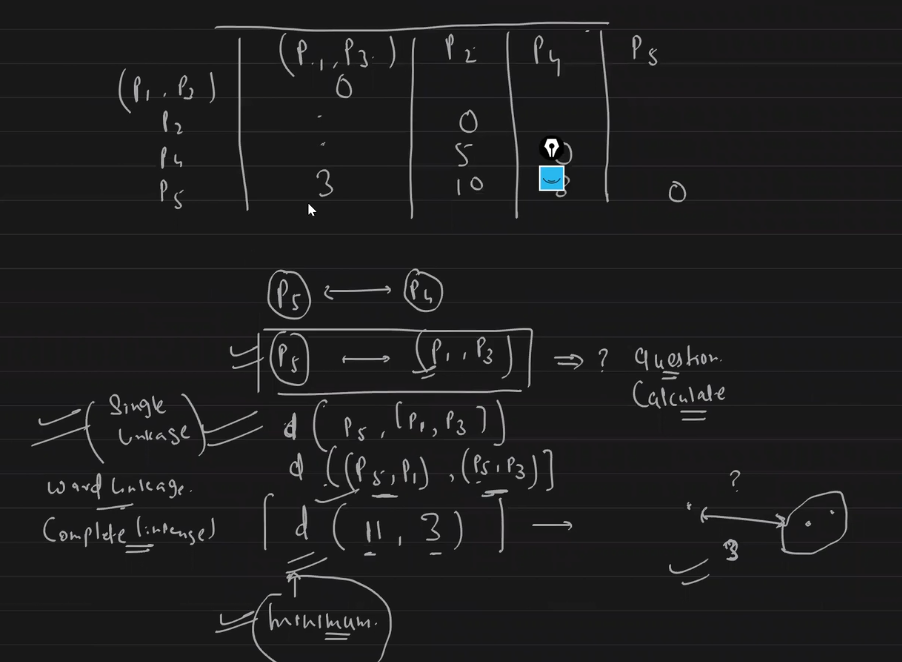

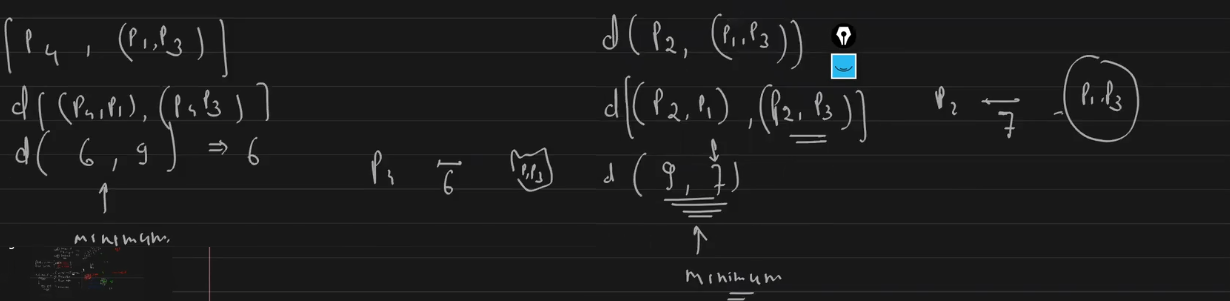

* recalculated matrix, then select the next minimum  distance pair



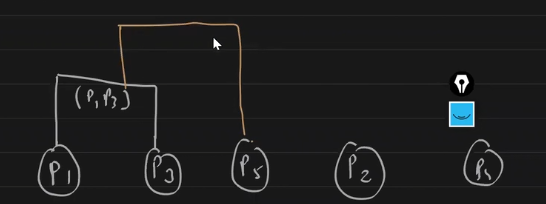

# Density Based Clustering - soft clustering method to incorporate noisy data based on density

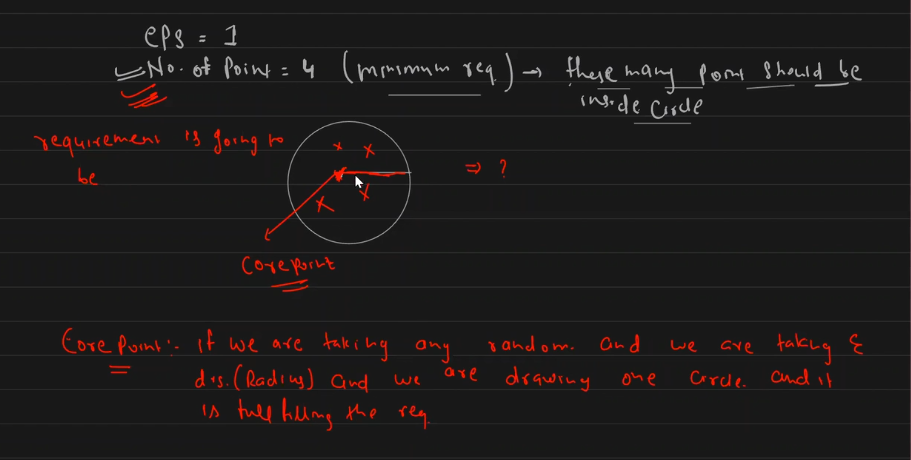

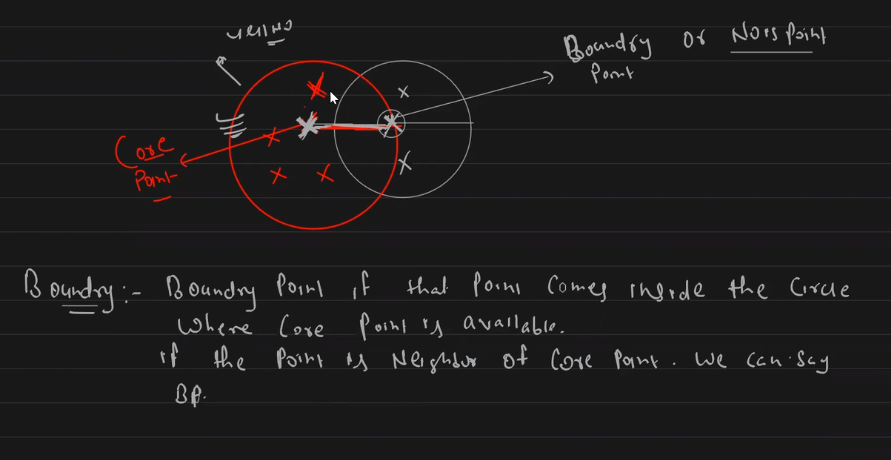

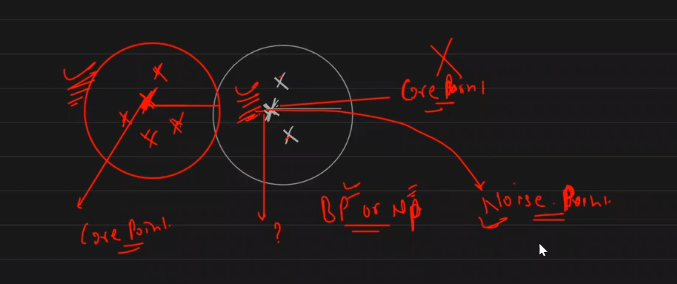

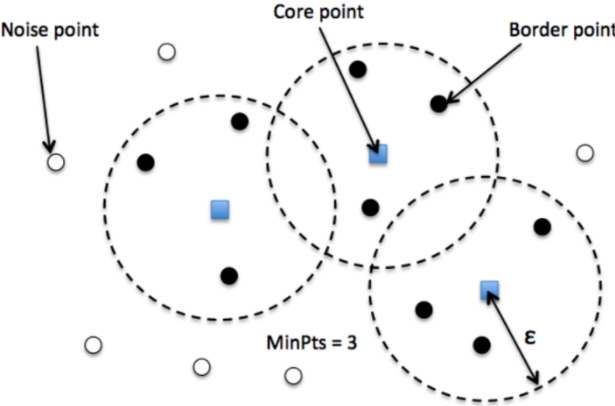

In [4]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image", cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'linalg', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
randn(10,2)  # creates an 10x2 array, Normally distributed random numbers

array([[-1.24210775,  0.17232461],
       [-0.4103032 ,  1.08156187],
       [ 1.09116991, -0.72898927],
       [-0.70404781, -0.11250218],
       [-0.93859064,  0.26520557],
       [-0.10087991, -1.69561725],
       [-0.95891779, -1.51422426],
       [ 0.70199123,  0.6160546 ],
       [-1.18974505,  0.38619041],
       [-0.61337023,  2.0528232 ]])

In [12]:
10*randn(10,2)

array([[ 11.79575324,  -4.40262312],
       [  2.71337767,  -0.53414374],
       [ -5.39143772,  -2.68108544],
       [  8.14778517,  -1.03549424],
       [  1.83180191,  -3.28521102],
       [ -2.51964698,   7.09262423],
       [  0.37412374,  -9.32234417],
       [-16.84632312,   8.79103364],
       [  0.40782638,  -4.42890672],
       [  3.91326945,   3.37240141]])

In [11]:
randn(10,2)+array([70,30])

array([[69.21160051, 28.74598682],
       [70.25497712, 29.83155256],
       [69.43783276, 31.67157313],
       [70.2279314 , 31.22473852],
       [70.40656394, 29.81227591],
       [70.51680181, 31.96720671],
       [70.50240903, 30.63565222],
       [71.80495786, 30.07517191],
       [70.60286196, 31.4712185 ],
       [69.79444304, 29.98556252]])

In [22]:
test = array([10,3])
test

array([10,  3])

In [23]:
[10*randn(1000,2)+array([70,30]), 10*randn(1000,2)+array([10,10]), 10*randn(1000,2)+array([50,80])]

[array([[75.26875393, 29.23999381],
        [88.56930734, 29.88173523],
        [56.66690657, 35.81986439],
        ...,
        [64.90670429, 40.48658578],
        [83.5376813 , 25.04974148],
        [95.93899736, 15.33474782]]),
 array([[ 2.60495978e+01,  4.76128897e+00],
        [ 2.26634934e+01, -1.96723885e-02],
        [ 1.03857472e+01, -6.94745959e+00],
        ...,
        [ 1.97746881e+01,  1.53602589e+01],
        [ 1.98640665e+01,  1.62024554e+01],
        [ 1.17318257e+01,  2.16973075e+00]]),
 array([[71.40396176, 70.79577463],
        [63.11500674, 94.45541923],
        [50.18751367, 86.55877783],
        ...,
        [48.20521371, 74.03110005],
        [37.75415608, 83.73855405],
        [54.40184028, 65.01012671]])]

In [26]:
# collection of points that are sampled from three diff densities, in this case normal densities with the same covariances but different means

data = r_[10*randn(1000,2)+array([70,30]), 10*randn(1000,2)+array([10,10]), 10*randn(1000,2)+array([50,80])]

# r_ merges the three arrays...


In [27]:
data

array([[72.48741954, 24.33434452],
       [64.91917514, 34.9293354 ],
       [53.94138589, 38.17208685],
       ...,
       [44.63015251, 81.77560578],
       [72.1630004 , 73.11708573],
       [56.45394486, 86.60710641]])

In [28]:
len(data)

3000

In [29]:
range(len(data))

range(0, 3000)

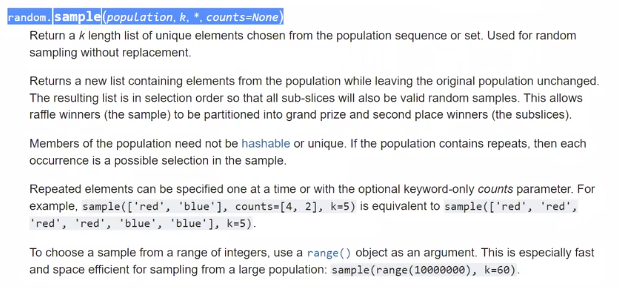

In [30]:
len(data)

3000

In [31]:
data.shape

(3000, 2)

In [32]:
data

array([[72.48741954, 24.33434452],
       [64.91917514, 34.9293354 ],
       [53.94138589, 38.17208685],
       ...,
       [44.63015251, 81.77560578],
       [72.1630004 , 73.11708573],
       [56.45394486, 86.60710641]])

In [34]:
data = data[pyrandom.sample(range(len(data)),len(data))]
data

array([[63.34700489, 35.624527  ],
       [37.83713466, 80.35062035],
       [11.41844172, -9.51334187],
       ...,
       [66.58381694, 22.27831017],
       [62.59781738, 92.33053775],
       [27.30060843, 81.39473519]])

In [ ]:
# scikit-learn.org/stable/modules/clusterning.html

In [35]:
data[:,0]

array([63.34700489, 37.83713466, 11.41844172, ..., 66.58381694,
       62.59781738, 27.30060843])

In [36]:
data[:,1]

array([35.624527  , 80.35062035, -9.51334187, ..., 22.27831017,
       92.33053775, 81.39473519])

In [37]:
figsize(10,10)
plot(data[:,0],data[:,1],"b+")

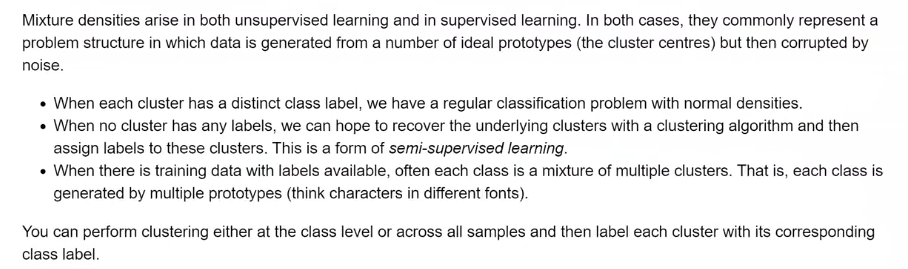

In [38]:
protos = array([[30,30],[40,20],[0,90],[50,50]])   # initialize centroids
protos

array([[30, 30],
       [40, 20],
       [ 0, 90],
       [50, 50]])

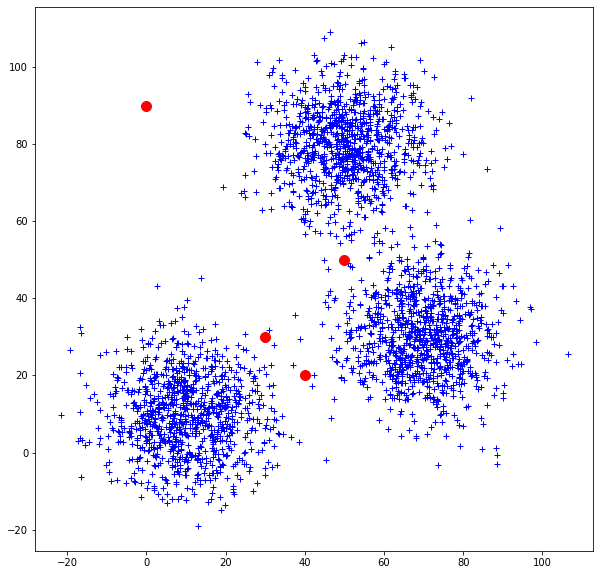

In [39]:
start = protos.copy()
figsize(10,10)
plot(data[:,0], data[:,1],"b+")
plot(protos[:,0], protos[:,1],"ro",markersize=10)

In [44]:
dists=cdist(protos,data)
dists

array([[ 33.81801353,  50.95689992,  43.66438473, ...,  37.38984027,
         70.33998603,  51.46557607],
       [ 28.09285463,  60.38936465,  41.08458132, ...,  26.68126721,
         75.77841409,  62.6944021 ],
       [ 83.48374149,  39.04816624, 100.16629184, ...,  94.97174291,
         62.64118571,  28.62470617],
       [ 19.61623725,  32.69702508,  70.92513306, ...,  32.30348388,
         44.16536458,  38.74134452]])

In [48]:
dists.shape

(4, 3000)

In [45]:
closests = argmin(dists,axis=0)
closests

array([3, 3, 1, ..., 1, 3, 2], dtype=int64)

In [46]:
len(dists)

4

In [47]:
len(closests)

3000

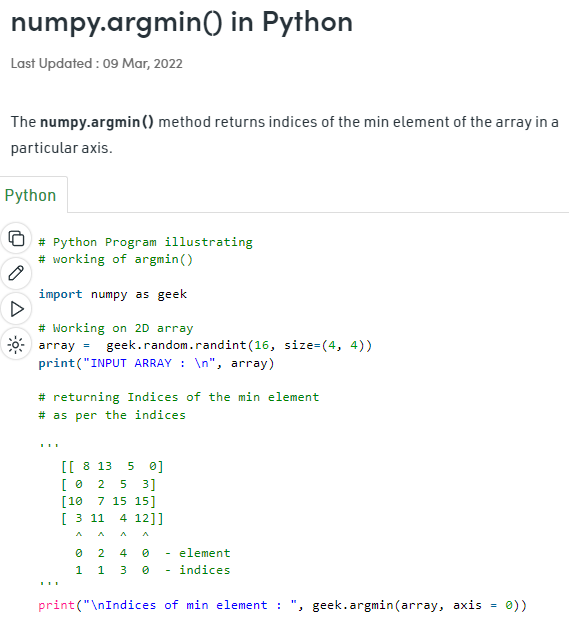

In [49]:
closests.shape

(3000,)

In [50]:
closests

array([3, 3, 1, ..., 1, 3, 2], dtype=int64)

In [53]:
set(closests)

{0, 1, 2, 3}

In [51]:
data.shape

(3000, 2)

In [52]:
data

array([[63.34700489, 35.624527  ],
       [37.83713466, 80.35062035],
       [11.41844172, -9.51334187],
       ...,
       [66.58381694, 22.27831017],
       [62.59781738, 92.33053775],
       [27.30060843, 81.39473519]])

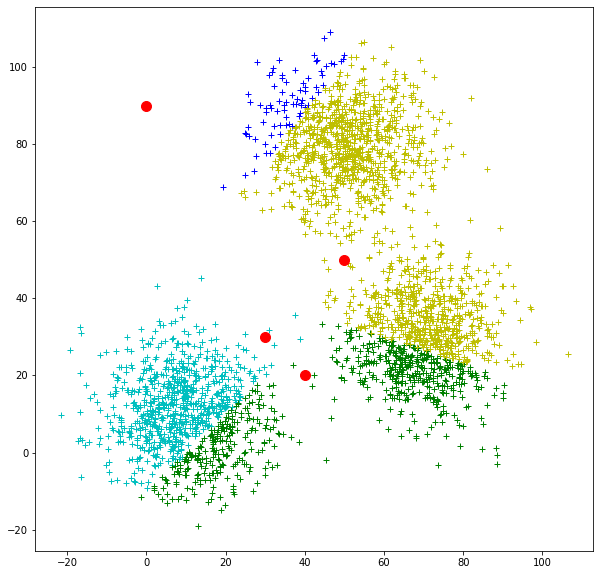

In [43]:
figsize(10,10)
dists=cdist(protos,data)
closests = argmin(dists,axis=0)

for i in range(len(protos)):
    plot(data[closests==i,0], data[closests==i,1],["c+","g+","b+","y+"][i])
plot(protos[:,0], protos[:,1],"ro",markersize=10)   

In [54]:
protos.copy()

array([[30, 30],
       [40, 20],
       [ 0, 90],
       [50, 50]])

In [55]:
[protos.copy()]

[array([[30, 30],
        [40, 20],
        [ 0, 90],
        [50, 50]])]

In [82]:
data[closests==0], data[closests==1], data[closests==2], data[closests==3]

(array([[ 8.03533786,  0.34888044],
        [ 1.64306582, 10.81210369],
        [ 1.30830615, 17.80076747],
        ...,
        [12.31972834, 12.69388953],
        [ 8.21887972,  5.25879167],
        [-7.31831694, -6.99340604]]), array([[11.41844172, -9.51334187],
        [56.08251811, 23.71894192],
        [26.26826708,  2.69287402],
        ...,
        [58.69504214, 24.84051014],
        [50.35266754, 23.97663486],
        [66.58381694, 22.27831017]]), array([[ 49.25097423, 101.67041576],
        [ 19.45670674,  68.97831941],
        [ 36.80489561,  92.66276948],
        [ 25.62719862,  92.89273259],
        [ 46.63538135, 100.91992769],
        [ 33.43318063,  91.16225257],
        [ 34.84864056,  90.13840658],
        [ 25.17094447,  82.71569201],
        [ 26.25877026,  90.84233798],
        [ 41.85330207,  91.9188539 ],
        [ 33.72037121,  82.50676103],
        [ 33.50524191, 101.81885039],
        [ 30.01269331,  80.06511206],
        [ 24.90463516,  82.77425943],
        

In [79]:
average(data[closests==2],axis=0)  

array([35.82122653, 91.22249901])

In [56]:
history = [protos.copy()]
for i in range(len(protos)):
    protos[i,:] = average(data[closests==i],axis=0)  # average value for each column for each protos
    
history.append(protos.copy())

In [ ]:
# we now pretend the cluster assignment are correct and recomput th elocatio of the centers

In [64]:
array(history)  # history of location of the centroids

array([[[30, 30],
        [40, 20],
        [ 0, 90],
        [50, 50]],

       [[ 6, 13],
        [48, 12],
        [35, 91],
        [59, 61]]])

In [68]:
ndim(history)  # 3d array

3

In [71]:
harray[:,0,0],harray[:,1,0],harray[:,2,0],harray[:,3,0]

(array([30,  6]), array([40, 48]), array([ 0, 35]), array([50, 59]))

In [72]:
harray[:,0,1],harray[:,1,1],harray[:,2,1],harray[:,3,1]

(array([30, 13]), array([20, 12]), array([90, 91]), array([50, 61]))

In [74]:
harray[0,:,0], harray[0,:,1]

(array([30, 40,  0, 50]), array([30, 20, 90, 50]))

In [75]:
protos[:,0], protos[:,1]

(array([ 6, 48, 35, 59]), array([13, 12, 91, 61]))

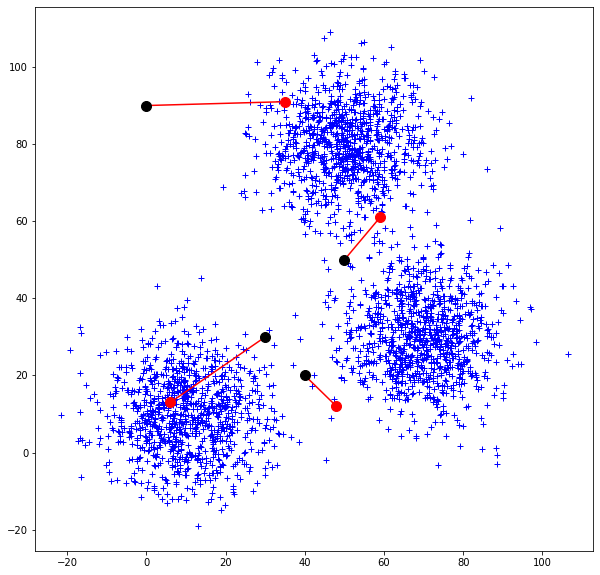

In [65]:
# plotting the centorid movements

figsize(10,10)
plot(data[:,0],data[:,1],"b+")                         # plot original points
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0], harray[:,i,1],"r")             #plots read line between  new and old centroid locations

plot(harray[0,:,0], harray[0,:,1],"ko",markersize=10)  # plots old centroid locations
plot(protos[:,0], protos[:,1],"ro",markersize=10)      # plots new centroid locations

In [ ]:
# lets repeat the process serval times

In [86]:
for round in range(1000):
    if round%100==0: sys.stderr.write(f" {round} ")
    dists = cdist(protos,data)
    closests = argmin(dists,axis=0)
    for i in range(len(protos)):
        protos[i,:] = average(data[closests==i],axis=0)
    history.append(protos.copy())

 0  100  200  300  400  500  600  700  800  900 

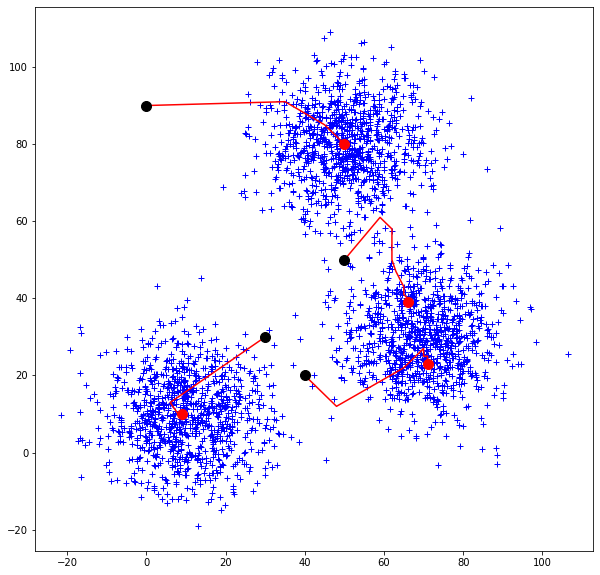

In [88]:
# plotting the centorid movements

figsize(10,10)
plot(data[:,0],data[:,1],"b+")                         # plot original points
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0], history[:,i,1],"r")             #plots read line between  new and old centroid locations

plot(history[0,:,0], history[0,:,1],"ko",markersize=10)  # plots old centroid locations
plot(protos[:,0], protos[:,1],"ro",markersize=10)      # plots new centroid locations

it can be ssen that the final locations of the centroides(red) are nicely in the center of the clusters. We do not get the exact cluster centers because there are 3 clusters and we asked for 4 cluster centers

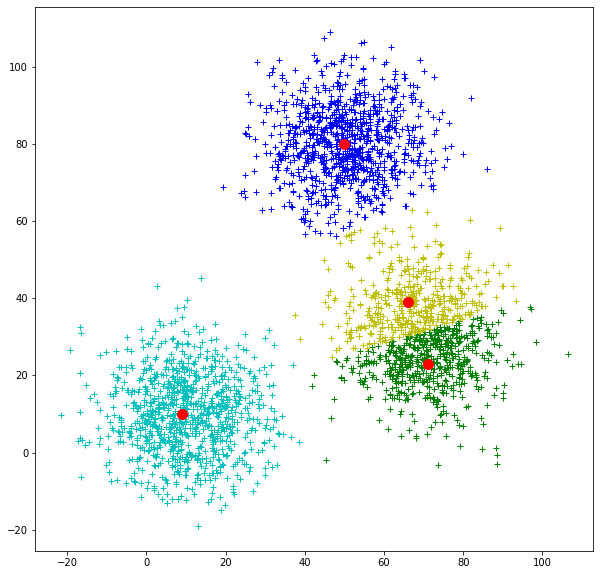

In [89]:
figsize(10,10)
dists=cdist(protos,data)
closests = argmin(dists,axis=0)

for i in range(len(protos)):
    plot(data[closests==i,0], data[closests==i,1],["c+","g+","b+","y+"][i])
plot(protos[:,0], protos[:,1],"ro",markersize=10)   

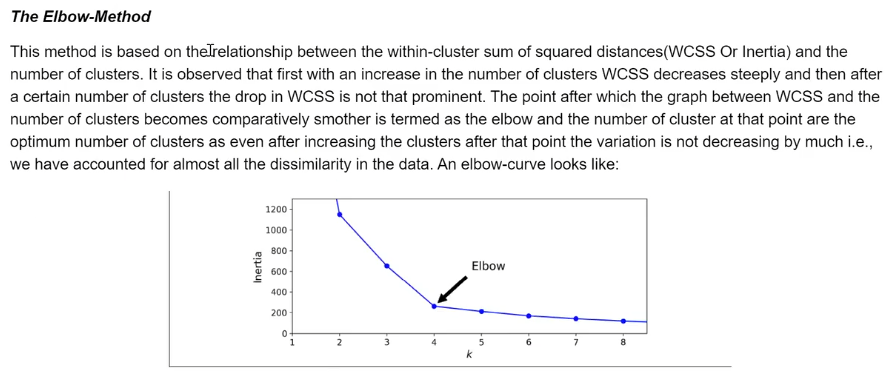

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
dataset = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv")
dataset

customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]

In [93]:
dataset.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [95]:
dataset.columns=['customer_id', 'gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']
dataset

customer_id  gender  age  annual_income(k$)  spending_score(1-100)
0              1    Male   19                 15                     39
1              2    Male   21                 15                     81
2              3  Female   20                 16                      6
3              4  Female   23                 16                     77
4              5  Female   31                 17                     40
..           ...     ...  ...                ...                    ...
195          196  Female   35                120                     79
196          197  Female   45                126                     28
197          198    Male   32                126                     74
198          199    Male   32                137                     18
199          200    Male   30                137                     83

[200 rows x 5 columns]

We need to cluster the dataset

we will drop the customer_id feature

In [96]:
X=dataset.iloc[:,3:]   # selecting two feature only
X

annual_income(k$)  spending_score(1-100)
0                   15                     39
1                   15                     81
2                   16                      6
3                   16                     77
4                   17                     40
..                 ...                    ...
195                120                     79
196                126                     28
197                126                     74
198                137                     18
199                137                     83

[200 rows x 2 columns]

In [99]:
X_array = array(X)
X_array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [101]:
protos = array([[ 20,  15],[ 54,  54],[ 62,  42],[103,  85]])   # initialize centroids randomly/manually
protos

array([[ 20,  15],
       [ 54,  54],
       [ 62,  42],
       [103,  85]])

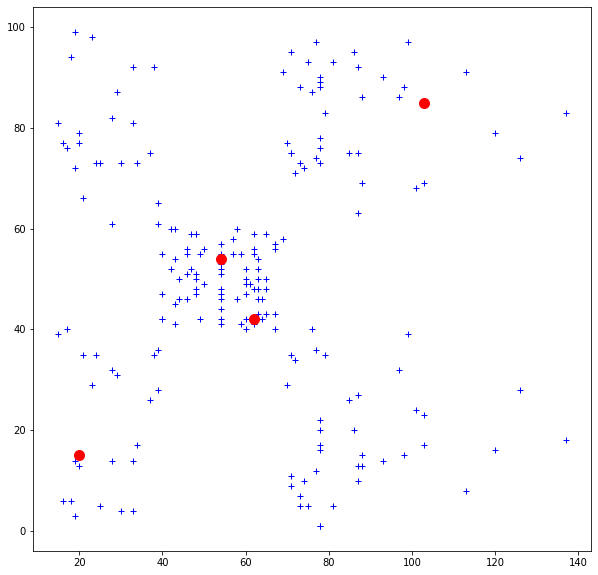

In [102]:
start = protos.copy()
figsize(10,10)
plot(X_array[:,0], X_array[:,1],"b+")
plot(protos[:,0], protos[:,1],"ro",markersize=10)

In [103]:
figsize(10,10)
dists=cdist(protos,X_array)
closests = argmin(dists,axis=0)

for i in range(len(protos)):
    plot(X_array[closests==i,0], X_array[closests==i,1],["c+","g+","b+","y+"][i])
plot(protos[:,0], protos[:,1],"ro",markersize=10)   

In [105]:
history = [protos.copy()]
for round in range(1000):
    if round%100==0: sys.stderr.write(f" {round} ")
    dists = cdist(protos,X_array)
    closests = argmin(dists,axis=0)
    for i in range(len(protos)):
        protos[i,:] = average(X_array[closests==i],axis=0)
    history.append(protos.copy())

 0  100  200  300  400  500  600  700  800  900 

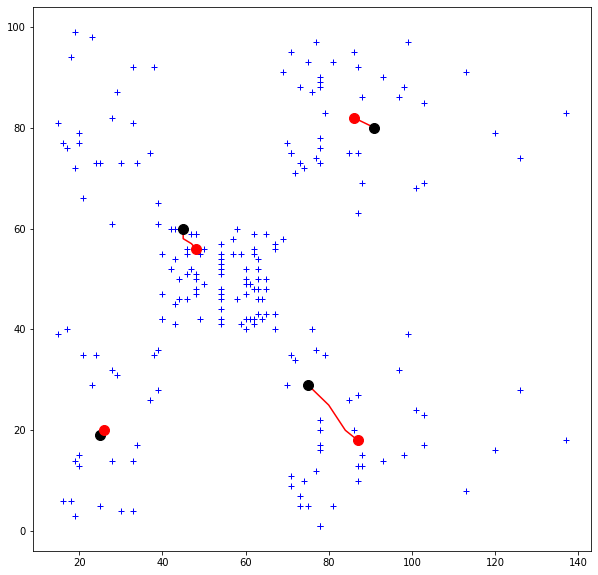

In [107]:
# plotting the centorid movements

figsize(10,10)
plot(X_array[:,0],X_array[:,1],"b+")                         # plot original points
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0], history[:,i,1],"r")             #plots read line between  new and old centroid locations

plot(history[0,:,0], history[0,:,1],"ko",markersize=10)  # plots old centroid locations
plot(protos[:,0], protos[:,1],"ro",markersize=10)      # plots new centroid locations

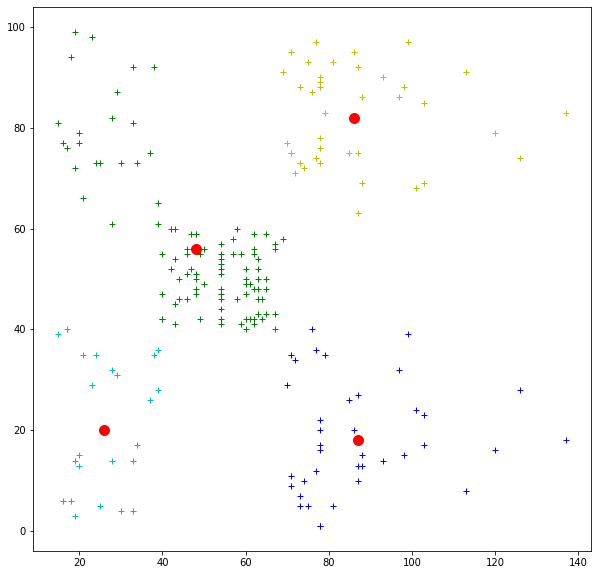

In [108]:
figsize(10,10)
dists=cdist(protos,X_array)
closests = argmin(dists,axis=0)

for i in range(len(protos)):
    plot(X_array[closests==i,0], X_array[closests==i,1],["c+","g+","b+","y+"][i])
plot(protos[:,0], protos[:,1],"ro",markersize=10)   

# elbow method

In [111]:
from sklearn.cluster import KMeans

wcss=[]        # (within-cluster sums of squares)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
           


In [115]:
# Fitting k-means to the dataset

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [117]:
len(y_kmeans), len(X)

(200, 200)

In [123]:
cluster_no = pd.DataFrame(y_kmeans, columns=["cluster_value"])
cluster_no

cluster_value
0                2
1                3
2                2
3                3
4                2
..             ...
195              4
196              1
197              4
198              1
199              4

[200 rows x 1 columns]

In [126]:
result = pd.concat([X,cluster_no], axis=1)
result

annual_income(k$)  spending_score(1-100)  cluster_value
0                   15                     39              2
1                   15                     81              3
2                   16                      6              2
3                   16                     77              3
4                   17                     40              2
..                 ...                    ...            ...
195                120                     79              4
196                126                     28              1
197                126                     74              4
198                137                     18              1
199                137                     83              4

[200 rows x 3 columns]

In [127]:
result[result.cluster_value==2]

annual_income(k$)  spending_score(1-100)  cluster_value
0                  15                     39              2
2                  16                      6              2
4                  17                     40              2
6                  18                      6              2
8                  19                      3              2
10                 19                     14              2
12                 20                     15              2
14                 20                     13              2
16                 21                     35              2
18                 23                     29              2
20                 24                     35              2
22                 25                      5              2
24                 28                     14              2
26                 28                     32              2
28                 29                     31              2
30                 30                      4              2
32                 33                      4              2
34                 33                     14              2
36                 34                     17              2
38                 37                     26              2
40                 38                     35              2
42                 39                     36              2
44                 39                     28              2

In [129]:
for i in result.groupby("cluster_value"):
    print(i)

(0,      annual_income(k$)  spending_score(1-100)  cluster_value
43                  39                     61              0
46                  40                     55              0
47                  40                     47              0
48                  40                     42              0
49                  40                     42              0
..                 ...                    ...            ...
121                 67                     40              0
122                 69                     58              0
126                 71                     35              0
132                 72                     34              0
142                 76                     40              0

[81 rows x 3 columns])
(1,      annual_income(k$)  spending_score(1-100)  cluster_value
124                 70                     29              1
128                 71                     11              1
130                 71                      9        

In [130]:
# predict the cluster number to which the datapoint belongs to

test = kmeans.predict(np.asarray([[ 78,  73]]))
test
                      

array([4])

In [132]:
# saving the model to the local file system

import pickle

filename = "finalized_kmeans_model.pickle"
pickle.dump(kmeans, open(filename, "wb"))

In [133]:
# looking at the points which below to cluster 0

X[y_kmeans==0]

annual_income(k$)  spending_score(1-100)
43                  39                     61
46                  40                     55
47                  40                     47
48                  40                     42
49                  40                     42
..                 ...                    ...
121                 67                     40
122                 69                     58
126                 71                     35
132                 72                     34
142                 76                     40

[81 rows x 2 columns]

In [134]:
result[y_kmeans==0]

annual_income(k$)  spending_score(1-100)  cluster_value
43                  39                     61              0
46                  40                     55              0
47                  40                     47              0
48                  40                     42              0
49                  40                     42              0
..                 ...                    ...            ...
121                 67                     40              0
122                 69                     58              0
126                 71                     35              0
132                 72                     34              0
142                 76                     40              0

[81 rows x 3 columns]

In [143]:
# Visualising the clusters

plt.scatter(X[y_kmeans==0]["annual_income(k$)"],X[y_kmeans==0]["spending_score(1-100)"],s=100,c="red",label="0")
plt.scatter(X[y_kmeans==1]["annual_income(k$)"],X[y_kmeans==1]["spending_score(1-100)"],s=100,c="green",label="1")
plt.scatter(X[y_kmeans==2]["annual_income(k$)"],X[y_kmeans==2]["spending_score(1-100)"],s=100,c="blue",label="2")
plt.scatter(X[y_kmeans==3]["annual_income(k$)"],X[y_kmeans==3]["spending_score(1-100)"],s=100,c="yellow",label="3")
plt.scatter(X[y_kmeans==4]["annual_income(k$)"],X[y_kmeans==4]["spending_score(1-100)"],s=100,c="gray",label="4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="black",label="centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

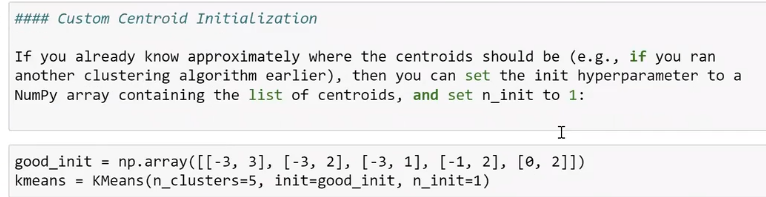

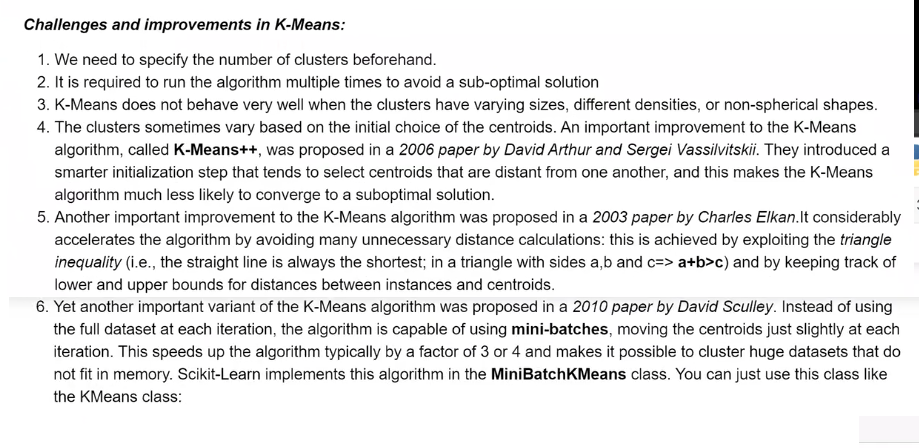

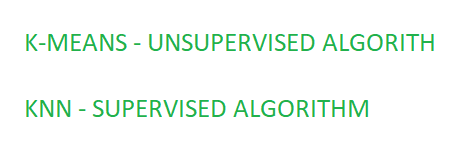